## INTRODUZIONE
Questo progetto nasce come estensione del lavoro svolto nella mia **tesi di laurea triennale**.Nel *capitolo 4* di essa, ho descritto la parte sperimentale, in cui ho raccolto manualmente una serie di commenti dal [**Forum dei Brutti**](https://ilforumdeibrutti.is/).  
Le conversazioni selezionate avevano come tema centrale le **app di dating** (*Tinder, Hinge, Bumble*, ecc.), e i commenti sono stati selezionati e salvati in un file Excel:**Analisi chat FDB_Tesi**.

Su questi commenti è stata effettuata un'**annotazione manuale**, successivamente **rivista e sistematizzata** tenendo in considerazione un [**codebook**](https://drive.google.com/file/d/1h9JiDtprJfs074_beMM9OddHhzBuC_53/view?usp=drive_link), per garantire una **coerenza metodologica solida** che definisce con precisione i **criteri di annotazione** relativi a:
- **sentiment** (*positivo, negativo, neutro*),
- **tematiche principali** (*affidabilità, inganno, costo, utilità*),
- **emozioni** (*speranza, scetticismo, frustrazione*).
  
Durante lo studio e l’analisi di questo corpus, è emersa chiaramente la presenza di un **linguaggio specifico**, composto da *slang*, *abbreviazioni*, *acronimi* e *termini propri del gruppo sociale* che popola il forum.  
Si tratta di un lessico non conforme a quello utilizzato nella comunicazione quotidiana standard, ma fortemente marcato da dinamiche interne al gruppo sociale studiato.

Quindi, l’obiettivo generale di questo progetto è quello di **replicare in modo computazionale** – attraverso l'uso di *librerie Python*, *regex* e *script adeguati* – un **dizionario dei termini** ricorrenti nei commenti del forum.    

Ad oggi, per ragioni di tempo e nell’ottica di presentare comunque una versione funzionale del progetto, la **pagina web del dizionario** includerà inizialmente *tutti i lemmi estratti* dai commenti del forum. Tuttavia, il dizionario sarà oggetto di successive revisioni e verrà progressivamente **migliorato** per mettere in evidenza:  
- i termini **più frequenti**,  
- gli **acronimi**,
- le **abbreviazioni**,
- e lo **slang** caratteristici della community.

L’obiettivo è quello di costruire uno strumento che non solo raccolga, ma *interpreti e valorizzi* il linguaggio specifico utilizzato nel forum.

## CORPORA SPECIALISTICI
A differenza dei corpora generali, che mirano a rappresentare una lingua nel suo complesso e sono plurifunzionali, i corpora specialistici si concentrano su varietà linguistiche più ristrette e ben definite. Questo approccio, altamente adattato a un particolare tipo di linguaggio, consente di sviluppare rapidamente corpora, anche di dimensioni contenute, ma dotati di un **alto grado di rappresentatività** per quel dominio specifico. Ad esempio, rientrano in questa categoria i corpora destinati allo studio della lingua di un autore, di domini settoriali (come il linguaggio giuridico) o di particolari generi testuali, quali gli SMS o i notiziari stampa.

Questo progetto, focalizzato su slang, abbreviazioni, acronimi e termini propri di un gruppo sociale che popola il forum, si inserisce perfettamente in questa tipologia. Il lessico in questione, non conforme alla comunicazione standard e fortemente marcato da dinamiche interne al gruppo, costituisce un esempio di **dati ecologici** direttamente estratti dal loro "habitat naturale", che ricordiamo si distinguono dai **dati controllati**, che invece,sono dati linguistici ottenuti in un contesto controllato di laboratorio, dove lo scienziato (o linguista) prepara situazioni sperimentali (somministra dei questionari) ad hoc per verificare una particolare ipotesi di ricerca. Sebbene il web, in generale, possa essere considerato **"anarchico" e "dinamico"**, la sua enorme estensione lo rende una preziosa "miniera" per la costruzione di corpora specialistici e per la scoperta di **neologismi o nuovi sensi delle parole**.

Per raggiungere l'obiettivo di **replicare computazionalmente un dizionario** dei termini ricorrenti nel corpus, la linguistica computazionale si avvale di **metodi e strumenti avanzati**.  
Un aspetto fondamentale di questo approccio è la necessità di **rendere esplicite** le informazioni implicite nel testo, come le sue strutture linguistiche, attraverso una **codifica di alto livello**.

Sebbene solitamente tale codifica venga implementata in formati come *XML (eXtensible Markup Language)*, in questo progetto – nella fase finale – si è scelto di utilizzare l'**HTML** come linguaggio di codifica. L’**obiettivo** è garantire una maggiore **leggibilità dei dati elaborati** dagli script in python, rendendo visibile la struttura linguistico-testuale e, più in generale, ogni informazione interpretativa utile all’analisi. In questo modo, l’output computazionale non è solo funzionale, ma anche *accessibile* e *interpretabile*.  

In [1]:
!pip install kagglehub[pandas-datasets]
!python -m spacy download it_core_news_sm
!pip install -q sentence-transformers
!pip install -q scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
from collections import Counter
import spacy
import it_core_news_sm
import emoji
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors 
import re
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false" #ho disabilitato il parallelismo dei tokenizer, come suggerito nel messaggio di WARNING. 

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [3]:
#Per leggere i dati utilizziamo la funzione della libreria pandas: pd.read_csv()
percorso_file = "/kaggle/input/dataset-fdb/Dataset_FDB.csv"
df = pd.read_csv(percorso_file)
print("Le prime righe del dataset:")
df.head()

Le prime righe del dataset:


,Commenti
0,"riapro questo topic qui, il tema è stato più v..."
1,Andrò controcorrente evitando di dire che se n...
2,Su tinder devi avere il gold o il platino ma d...
3,"Si tutti scam, ci sono stati anche dei servizi..."
4,"Peggio che nella vita reale, in queste app i r..."


## REGEX
Per il preprocessing del testo avremmo potuto utilizzare **librerie avanzate come `spaCy`**, che offrono strumenti pronti per compiti come la tokenizzazione, il POS-tagging e la lemmatizzazione.

Tuttavia, per restare coerenti con l’approccio teorico e pratico descritto nel manuale *Testo e computer*, ho scelto di lavorare direttamente con le **espressioni regolari (regex)**.

Le **espressioni regolari**, o *regular expressions*, sono una **notazione algebrica formale** che consente di definire pattern (schemi) per identificare stringhe specifiche all’interno di un testo.  
Questo approccio è particolarmente utile per:
- la **pulizia del testo** (rimozione di punteggiatura, simboli, ecc.),
- la **tokenizzazione manuale**,
- il **riconoscimento di abbreviazioni, acronimi, date, numeri**,
- **normalizzare le varianti ortografiche** (es. `database vs data base, semilavorato vs semi-lavorato o semi lavorato`), che devono essere considerate come token unici.
- la **gestione confini linguistici** non banali (es. `C'era`, `U.S.A.`, `25/06/2025`).

Nel progetto, ad esempio, è stata usata la regex `r"[^\w\sàèéìòù]"` per *rimuovere ogni elemento che non sia una lettera, uno spazio o una vocale accentata italiana*, mantenendo così solo il contenuto linguistico rilevante per le fasi successive di analisi.


Nonostante la loro versatilità, le espressioni regolari presentano anche **diversi limiti**, soprattutto nel contesto dell’analisi linguistica:
- Non è sempre facile formulare ER che trovino *tutti e soltanto* i dati rilevanti. Le regex possono restituire *contesti indesiderati* oppure *mancare strutture di interesse*, rendendo necessario scrivere più espressioni per coprire vari casi.
- le regex sono **case-sensitive** per impostazione predefinita. La normalizzazione delle maiuscole può portare a *perdere informazioni linguistiche* importanti (es. `Rossi` vs `rossi`, `USA` vs `usa`), oppure introdurre *ambiguità semantiche*.
- le ER funzionano bene su *pattern formali*, ma non sono adatte a distinguere *categorie grammaticali* complesse (es. nomi, verbi, aggettivi) o a escludere *falsi positivi* senza un testo già annotato. Per esempio, non possono distinguere se `porta` è un nome o un verbo senza contesto.
- alcune *strutture linguistiche* (sintattiche o discorsive) non possono essere rappresentate tramite ER.

In [4]:
#Rimuoviamo le emoji dalla colonna "Commenti"
df["No_emoji"] = [emoji.replace_emoji(t, replace="") for t in df["Commenti"]]

#Rimuoviamo punteggiatura e simboli (ma non lettere accentate) dalla colonna "No_emoji"
def pulisci_testo(testo):
    testo_pulito = re.sub(r"[^\w\sàèéìòù]", "", str(testo))
    return testo_pulito
df["No_emoji"] = df["No_emoji"].apply(pulisci_testo)

#Mostriamo le colonne Commenti e No_emoji per verifica
display(df[["Commenti", "No_emoji"]])

print("___ \n")
#Salva il dataset aggiornato
df.to_csv("Dataset_FDB_aggiornato.csv", index=False, encoding="utf-8")
print("File salvato: Dataset_FDB_aggiornato.csv")

,Commenti,No_emoji
0,"riapro questo topic qui, il tema è stato più v...",riapro questo topic qui il tema è stato più vo...
1,Andrò controcorrente evitando di dire che se n...,Andrò controcorrente evitando di dire che se n...
2,Su tinder devi avere il gold o il platino ma d...,Su tinder devi avere il gold o il platino ma d...
3,"Si tutti scam, ci sono stati anche dei servizi...",Si tutti scam ci sono stati anche dei servizi ...
4,"Peggio che nella vita reale, in queste app i r...",Peggio che nella vita reale in queste app i ra...
...,...,...
207,Io mi ritrovai con una che non mi piaceva e le...,Io mi ritrovai con una che non mi piaceva e le...
208,Capitato ormai anni fa…lei carina mentre io in...,Capitato ormai anni falei carina mentre io ing...
209,Io conosciuto una su Badoo anni e anni fa e mi...,Io conosciuto una su Badoo anni e anni fa e mi...
210,Il tempo di vedermi e si infilò nella smart pe...,Il tempo di vedermi e si infilò nella smart pe...


___ 

File salvato: Dataset_FDB_aggiornato.csv


Il codice esegue un preprocessing sui commenti testuali: prima converte tutto il testo in **minuscolo**, poi utilizza una espressione regolare per **rimuovere numeri che si trovano all'inizio di una parola**, quando sono **immediatamente seguiti da caratteri alfanumerici** (es. `1tinder` → `tinder`).

- `\b` → confine di parola: assicura che il numero sia all’inizio della parola.
- `\d+` → una o più cifre numeriche.
- `(?=\w)` → lookahead positiva: controlla che dopo il numero ci sia un carattere alfanumerico, ma *senza includerlo nella sostituzione*.

Puliamo il testo rimuovendo prefissi numerici che non hanno valore semantico, che caratterizzano frequenti errori di battitura in ambienti informali come i forum.

In [5]:
df["Minuscolo"] = df["No_emoji"].str.lower()

#rimuoviamo i  numeri che sono seguiti subito da lettere =errori di battitura
df["Minuscolo"] = df["Minuscolo"].apply(lambda testo: re.sub(r'\b\d+(?=\w)', '', str(testo)))
display(df[["Commenti", "No_emoji", "Minuscolo"]])

df.to_csv("Dataset_FDB_aggiornato.csv", index=False, encoding="utf-8")
print("___ \n")
print("File salvato: Dataset_FDB_aggiornato.csv")

,Commenti,No_emoji,Minuscolo
0,"riapro questo topic qui, il tema è stato più v...",riapro questo topic qui il tema è stato più vo...,riapro questo topic qui il tema è stato più vo...
1,Andrò controcorrente evitando di dire che se n...,Andrò controcorrente evitando di dire che se n...,andrò controcorrente evitando di dire che se n...
2,Su tinder devi avere il gold o il platino ma d...,Su tinder devi avere il gold o il platino ma d...,su tinder devi avere il gold o il platino ma d...
3,"Si tutti scam, ci sono stati anche dei servizi...",Si tutti scam ci sono stati anche dei servizi ...,si tutti scam ci sono stati anche dei servizi ...
4,"Peggio che nella vita reale, in queste app i r...",Peggio che nella vita reale in queste app i ra...,peggio che nella vita reale in queste app i ra...
...,...,...,...
207,Io mi ritrovai con una che non mi piaceva e le...,Io mi ritrovai con una che non mi piaceva e le...,io mi ritrovai con una che non mi piaceva e le...
208,Capitato ormai anni fa…lei carina mentre io in...,Capitato ormai anni falei carina mentre io ing...,capitato ormai anni falei carina mentre io ing...
209,Io conosciuto una su Badoo anni e anni fa e mi...,Io conosciuto una su Badoo anni e anni fa e mi...,io conosciuto una su badoo anni e anni fa e mi...
210,Il tempo di vedermi e si infilò nella smart pe...,Il tempo di vedermi e si infilò nella smart pe...,il tempo di vedermi e si infilò nella smart pe...


___ 

File salvato: Dataset_FDB_aggiornato.csv


Nel seguente blocco di codice identifichiamo i **termini brevi e ricorrenti** presenti nei commenti del forum.  
L’obiettivo è isolare parole con **una determinata frequenza e lunghezza ridotta** (in questo caso ≤ 6 caratteri), che potrebbero includere **slang, abbreviazioni, acronimi o errori ortografici** da normalizzare in fase successiva.

In [6]:
#Identifichiamo termini brevi e frequenti nei commenti del forum 
#(possibili gergalismi o altri errori da normalizzare)

tutti_i_token = " ".join(df["Minuscolo"]).split() #tokenizziamo
conteggio = Counter(tutti_i_token)

#Trova parole molto frequenti con lunghezza definita
gergalismi_sospetti = [token for token, freq in conteggio.items() if freq >= 1 and len(token) <= 6]
print(gergalismi_sospetti)

['riapro', 'questo', 'topic', 'qui', 'il', 'tema', 'è', 'stato', 'più', 'volte', 'negli', 'altri', 'forum', 'in', 'io', 'dico', 'la', 'mia', 'un', '5', 'tinder', 'se', 'fai', 'rimedi', 'match', 'e', 'uscite', 'pure', 'ma', 'senza', 'pagare', 'non', 'ti', 'fa', 'fare', 'nulla', 'bumble', 'lo', 'trovo', 'si', 'dei', 'tipe', 'ecc', 'vedere', 'a', 'chi', 'sei', 'mette', 'limiti', 'ai', 'like', 'devi', 'tanto', 'meetic', 'mai', 'usato', 'ditemi', 'voi', 'alcuni', 'ne', 'meglio', 'badoo', 'pieno', 'di', 'fake', 'bot', 'me', 'parte', 'sono', 'che', 'poi', 'qua', 'paghi', 'serve', 'una', 'altro', 'dite', 'ormai', 'paga', 'per', 'piaci', 'le', 'molto', 'uno', 'chad', 'anche', 'gratis', 'grazie', 'al', 'cazzo', 'esce', 'strada', 'tipee', 'gli', 'danno', 'numero', 'andrò', 'dire', 'minimo', '7', 'hai', 'avere', 'delle', 'ci', 'crede', 'vuole', 'allora', 'farsi', 'belle', 'foto', 'da', 'sappia', 'come', 'figo', 'bello', 'tutto', 'fatte', 'dio', 'pose', 'con', 'alla', 'magari', 'pelle', 'colore', '

In [7]:
df = pd.read_csv("Dataset_FDB_aggiornato.csv")

#Dizionario di normalizzazione gergale
dizionario_normalizzazione = {
    "nn": "non",
    "cmq": "comunque",
    "fb": "facebook",
    "app": "applicazione",
    "apps": "applicazioni",
    "abire": "ambire",
    "abitaè": "abitare", 
    "incellone": "incel",
    "bisex": "bisessuale",
    "ste": "queste",
    "dassèè": "dasse",
    "x": "tinder",
    "abbonamente":"abbonamento"
}

#Funzione di normalizzazione
def normalizza_testo(testo, dizionario):
    parole = str(testo).split()  # sicurezza su NaN
    parole_normalizzate = [dizionario.get(parola.lower(), parola) for parola in parole]
    return " ".join(parole_normalizzate)

#Applica la normalizzazione
df["Normalizzato"] = df["Minuscolo"].apply(lambda x: normalizza_testo(x, dizionario_normalizzazione))

#Mostra le prime righe
print(df[["Minuscolo", "Normalizzato"]].head(10))

#Salva 
df.to_csv("Dataset_FDB_aggiornato.csv", index=False, encoding="utf-8")
print("___ \n")
print("File aggiornato salvato: Dataset_FDB_aggiornato.csv")

                                           Minuscolo  \
0  riapro questo topic qui il tema è stato più vo...   
1  andrò controcorrente evitando di dire che se n...   
2  su tinder devi avere il gold o il platino ma d...   
3  si tutti scam ci sono stati anche dei servizi ...   
4  peggio che nella vita reale in queste app i ra...   
5  hai spiegato perfettamente perchè queste app n...   
6  per me tutte le dating app andrebbero bannate ...   
7                               crude le dating apps   
8  si  pure io ho avuto questa impressione\n tind...   
9  giusto ieri abbiamo spottato con dei miei amic...   

                                        Normalizzato  
0  riapro questo topic qui il tema è stato più vo...  
1  andrò controcorrente evitando di dire che se n...  
2  su tinder devi avere il gold o il platino ma d...  
3  si tutti scam ci sono stati anche dei servizi ...  
4  peggio che nella vita reale in queste applicaz...  
5  hai spiegato perfettamente perchè queste appli... 

## TOKENIZZAZIONE E LEMMATIZZAZIONE
Le **espressioni regolari (regex)**, la **tokenizzazione**, la **lemmatizzazione** e l’**annotazione morfo-sintattica (POS tagging)** sono processi importanti della linguistica computazionale(LC) e della lessicografia digitale, per trasformare il testo grezzo in dati linguistici strutturati e interpretabili. 

1. La **tokenizzazione** è il processo di segmentazione del testo in unità discrete chiamate **token**. I token rappresentano le unità di base per i successivi livelli di elaborazione linguistica e includono parole, numeri, sigle, punteggiatura, nomi propri. Alcuni problemi che possiamo riscontrare durante questo processo:
    - **Punteggiatura ambigua**: segni come il punto possono indicare la fine di una frase, abbreviazioni, cifre decimali, date ecc.  
    - **Variazioni ortografiche e maiuscole**: es. `C'era` (un token unico graficamente ma due unità linguistiche). La normalizzazione delle maiuscole è fondamentale per evitare perdite di informazioni (es. `Rossi` vs `rossi`).
    - **Token complessi**: espressioni multilessicali o nomi propri composti come `Los Angeles`, o strutture alfanumeriche. Le regex permettono di definire formalmente schemi per segmentare e normalizzare il testo.
    - **Esempi di applicazione:**
        - **GATTO**: gestisce uniformemente i dati linguistici, dalla tokenizzazione alla lemmatizzazione.
        - **Vocabolario della Crusca (GDLI)**: include tokenizzazione con attenzione ad apostrofi, asterischi e punteggiatura indicizzata.
---

2. Annotazione Morfo-Sintattica (POS Tagging) consiste nell’assegnare a ogni token la categoria grammaticale specifica nel suo contesto (nome, verbo, aggettivo, ecc.), includendo spesso caratteristiche morfologiche (genere, numero, tempo). Risolve le **omografie** (es. `stato` come nome o verbo) basandosi sul contesto. È fondamentale per migliorare il recupero delle informazioni e per livelli successivi di annotazione (sintattica, semantica).
    - Automatizzata da programmi detti **tagger**, con intervento manuale per revisione.
    - Spesso codificata in XML con attributi o sottoelementi (es. `<pm pos="nome">legno</pm>`).
    - **Applicazioni:**  
        - Annotazioni morfo-sintattiche in corpora come il Brown Corpus, British National Corpus, e testi giornalistici.
        - **AGLIO**: marcatura dei tratti morfologici come attributi delle forme.
     
---

3. Lemmatizzazione consiste nel ricondurre ogni forma flessa al suo **lemma** (forma base, es. infinito per i verbi, singolare maschile per aggettivi). Permette di astrarre dalle variazioni morfologiche per recuperare tutte le forme associate a uno stesso lemma.
    - **Formari**: Sono liste di tutte le forme flesse di una lingua, ordinate alfabeticamente, dove ogni forma è associata al suo lemma. Il limite è il loro carattere statico e la difficoltà di essere esaustivi per lingue con ricca flessione (es. turco) o per parole nuove (neologismi).
    - **Stemmer**: Un programma più semplice che rimuove le terminazioni delle parole per ricondurle alla loro radice. Ha il vantaggio della generalità ma è soggetto a errori (radici sbagliate o mancato riconoscimento per alterazioni della radice)
    - **Analizzatori Morfologici**: Uno strumento più sofisticato che integra un lessico di radici, un lessico di affissi, regole di combinazione e regole di normalizzazione per le radici alterate. Produce una rappresentazione strutturale astratta (es. SALIRE + V3 + 1S PRES IND per salgo). Offre maggiore accuratezza rispetto agli stemmer, ma con maggiore complessità.
    - **Applicazioni:**  
        - **TLIO**: uso di dizionario macchina e lemmatizzazione precompilata.
        - **VSM**: lemmatizzazione controllata per il siciliano medievale.
        - **Vocabolario Dantesco**: riconoscimento dinamico di varianti lemma e accezioni.
        - **AGLIO**: analisi centrata sulla forma più che sul lemma.
        - **LGeRM**: lemmatizzatore per antico e medio francese, con repertorio di grafie e regole morfologiche.
---
Nel codice seguente, carichiamo un modello linguistico italiano "it_core_news_sm" e il dataset, definiamo una lista di token specifici del forum da preservare, e applichiamo una funzione che esegue tokenizzazione, lemmatizzazione e filtraggio POS, mantenendo inalterati termini caratteristici o inglesi e lemmatizzando correttamente le parole italiane. Il risultato è un dataset arricchito con lemmi e categorie grammaticali, pronto per analisi successive.

In [8]:
#Carichiamo il modello italiano e il dataset
nlp = spacy.load("it_core_news_sm")
df = pd.read_csv("Dataset_FDB_aggiornato.csv")

#Lista di token da non modificare, perché caratteristici del forum
token_non_modificare = {
    "blackpill", "redpill", "megere", "np", "kv", "lsm", 
    "incel", "oldcel", "stacy", "chad", "arpie", "mdf", "mgtow",
    "lovoo", "bumble", "tinder", "dating", "badoo", "match", "hinge"
}

#Tokenizzazione e lemmatizzazione con POS = teniamo solo ciò che ci interessa
def processa_testo(testo):
    doc = nlp(testo)
    pos_valide = ["ADJ", "NOUN", "VERB", "ADV", "PRON", "AUX"]
    
    tokens = []
    for token in doc:
        testo_originale = token.text.lower()
        
        #Se è nella lista esclusa definita sopra, mantieni la forma originale
        if testo_originale in token_non_modificare:
            tokens.append((testo_originale, token.pos_))
            continue
        
        #Escludi parole straniere: ad es. con caratteri non italiani
        if not token.is_stop and token.pos_ in pos_valide:
            if re.search(r'[a-zA-Z]', testo_originale) and not re.search(r'[àèéìòù]', testo_originale):
                #Probabile parola inglese -> usa la forma originale
                tokens.append((testo_originale, token.pos_))
            else:
                #Parola italiana -> lemmatizza
                lemma = token.lemma_.lower()
                tokens.append((lemma, token.pos_))
    return tokens

#Applichiamo la funzione
df["Token_POS"] = df["Normalizzato"].apply(processa_testo)

#Colonna con tutti i lemmi (solo i lemmi)
df["Lemmi"] = df["Token_POS"].apply(lambda lista: " ".join([lemma for lemma, pos in lista]))

#Colonna con lemma/POS in formato leggibile (es. abbonamento/NOUN)
df["Lemmi_POS"] = df["Token_POS"].apply(lambda lista: " ".join([f"{lemma}/{pos}" for lemma, pos in lista]))

#Salviamo e stampiamo
df.to_csv("Dataset_FDB_aggiornato.csv", index=False, encoding="utf-8")
print(df[["Normalizzato", "Token_POS", "Lemmi", "Lemmi_POS"]].head(5))
print("___ \n")
print("File salvato: Dataset_FDB_aggiornato.csv")

                                        Normalizzato  \
0  riapro questo topic qui il tema è stato più vo...   
1  andrò controcorrente evitando di dire che se n...   
2  su tinder devi avere il gold o il platino ma d...   
3  si tutti scam ci sono stati anche dei servizi ...   
4  peggio che nella vita reale in queste applicaz...   

                                           Token_POS  \
0  [(riapro, VERB), (topic, NOUN), (tema, NOUN), ...   
1  [(andrò, NOUN), (controcorrente, ADV), (evitan...   
2  [(tinder, NOUN), (devi, AUX), (platino, NOUN),...   
3  [(scam, VERB), (servizi, NOUN), (mediatici, AD...   
4  [(reale, ADJ), (applicazione, NOUN), (rapporti...   

                                               Lemmi  \
0  riapro topic tema affrontato forum precedenza ...   
1  andrò controcorrente evitando minimo chances m...   
2  tinder devi platino devi assolutamente boost c...   
3  scam servizi mediatici ufficiali dimostravano ...   
4  reale applicazione rapporti sbilanciati vag

Il codice carica un file **CSV** contenente una colonna di **lemmi**, estrae tutti i lemmi in una **lista unica**, li ordina **alfabeticamente** e ne conta le **occorrenze**.  
Successivamente crea due **DataFrame**: uno con **tutti i lemmi** (inclusi i duplicati) e un altro con i **lemmi univoci** associati alla loro **frequenza** nei commenti.  
Ad entrambi i DataFrame viene aggiunta una colonna **ID progressiva** per il riferimento.  

Infine, il **vocabolario univoco** con **frequenze** e **ID** viene salvato in un file CSV e vengono stampati i **primi record** e i **totali** dei lemmi presenti.

In [9]:
df = pd.read_csv("Dataset_FDB_aggiornato.csv")

#Uniamo tutte le stringhe della colonna "Lemmi" in un'unica lista di lemmi raw
tutti_i_lemmi_raw = " ".join(df["Lemmi"].dropna()).split()

#Ordine alfabetico
tutti_i_lemmi_raw.sort()

#Contiamo le occorrenze dei lemmi
conteggio = Counter(tutti_i_lemmi_raw)

#DataFrame con tutti i lemmi (con duplicati)
df_lemmi = pd.DataFrame(tutti_i_lemmi_raw, columns=["Lemma"])

#DataFrame con lemmi univoci e frequenza nei commenti
vocabolario_df = pd.DataFrame(list(conteggio.items()), columns=["Lemma_univoco", "Frequenza"])
vocabolario_df = vocabolario_df.sort_values(by="Lemma_univoco").reset_index(drop=True)

#Aggiungiamo colonna ID progressiva - possiamo avere un riferimento di un lemma all'interno del dataset
df_lemmi["ID"] = range(1, len(df_lemmi) + 1)
vocabolario_df["ID"] = range(1, len(vocabolario_df) + 1)
df_univoci = vocabolario_df[["ID", "Lemma_univoco", "Frequenza"]]

print("Primi lemmi con duplicati:")
print(df_lemmi.head(5))
print("\n---\n")
print("Primi lemmi univoci con frequenza:")
print(vocabolario_df.head(5))
print("\n---\n")

#Salviamo il vocabolario univoco e frequenza in csv
vocabolario_df.to_csv("vocabolario_base.csv", index=False, encoding="utf-8")
print("File 'vocabolario_base.csv' salvato con lemmi univoci, frequenza e ID.")

#Stampiamo i totali
print(f"\nTotale lemmi (con duplicati): {len(df_lemmi)}")
print(f"Totale lemmi univoci: {len(vocabolario_df)}")

Primi lemmi con duplicati:
         Lemma  ID
0  abbonamenti   1
1  abbonamento   2
2     abbonano   3
3   abbondante   4
4   abbondanti   5

---

Primi lemmi univoci con frequenza:
  Lemma_univoco  Frequenza  ID
0   abbonamenti          1   1
1   abbonamento          1   2
2      abbonano          1   3
3    abbondante          1   4
4    abbondanti          1   5

---

File 'vocabolario_base.csv' salvato con lemmi univoci, frequenza e ID.

Totale lemmi (con duplicati): 5413
Totale lemmi univoci: 2797


Il codice **carica un vocabolario da un file CSV** e definisce una funzione per cercare un *lemma esatto* all'interno del DataFrame.  
La funzione **normalizza la parola in input** (minuscolo e senza spazi) e restituisce tutte le occorrenze corrispondenti mostrando **posizione, lemma e frequenza**.  
L'utente può inserire una parola da tastiera per eseguire la ricerca nel vocabolario.  
Questo permette di verificare la presenza e la frequenza di specifici lemmi, utile per controlli *post-lemmatizzazione* o *normalizzazione*.

In [10]:
vocabolario = pd.read_csv("vocabolario_base.csv")

def cerca_lemma_esatto(parola, vocabolario_df):
    parola = parola.lower().strip()
    risultati = vocabolario_df[vocabolario_df["Lemma_univoco"] == parola]  #Cerca il lemma uguale a parola
    
    if risultati.empty:
        print(f"Nessun lemma esatto trovato per '{parola}'")
    else:
        for idx, riga in risultati.iterrows():
            print(f"Posizione: {idx}, Lemma: {riga['Lemma_univoco']}, Frequenza: {riga['Frequenza']}")

#Input da tastiera - possiamo digitare noi una parola e poi cercarla all'interno della colonna
#ad esempio io l'ho usato per controllare che le parole definite precedentemente non fossero state modificate
#durante la lemmatizzazione, ma anche per verificare che alcune siano state normalizzate correttamente
parola_input = input("Inserisci una parola da cercare: ")
cerca_lemma_esatto(parola_input, vocabolario)

Inserisci una parola da cercare:  app


Nessun lemma esatto trovato per 'app'


## AGLIO 
Nel seguente blocco di codice abbiamo utilizzato le **espressioni regolari (regex)** per estrarre automaticamente i *lemmi* e i relativi *link* da un **file PHP** scaricato dal sito *Aglio (OVI)*.  

La **regex** è stata progettata per identificare le righe contenenti:
- il **lemma**,
- il link alla **mappa**,
- il link alle **aree**,
- il link alle **forme**.

Dopo aver trovato tutte le corrispondenze, i dati vengono salvati in un **DataFrame pandas** e poi esportati in un file CSV.  
Questa procedura automatizza l’estrazione di dati strutturati da una pagina HTML, evitando l’inserimento manuale.

---
Per dare un riferimento **affidabile, grammaticale e storico** a ciascun lemma nel nostro vocabolario computazionale, abbiamo scelto di collegarci al progetto **AGLIO (Atlante Grammaticale della Lingua Italiana delle Origini)**, sviluppato dall’**Opera del Vocabolario Italiano (OVI)**.  
L’integrazione dei link al sito AGLIO consente all’utente finale di:
    - **Approfondire la storia di ogni lemma rilevante**: consulta verbi, pronomi, ausiliari e altre forme grammaticali per scoprire **come si sono evoluti nei secoli**, in quali **contesti erano usati**, quali **varianti** avevano, ecc.
    - **Confrontare le forme moderne e storiche**: ad esempio, per lemmi come `andare` o `si`, AGLIO documenta **usi e flessioni medievali** non più in uso oggi, offrendo uno sguardo sull'evoluzione della lingua.
    - **Visualizzare distribuzioni geolinguistiche**:ogni forma può essere associata a specifiche **aree dialettali o geografiche**, con rappresentazione cartografica interattiva (es. `fiorentino`, `senese`, `umbro`...).

---
L’**OVI** è il centro di ricerca del **CNR** dedicato alla lessicografia dell’italiano antico.  
È responsabile della creazione e gestione del **Corpus TLIO**, un immenso archivio di testi in volgare anteriore al 1375, ma si occupa anche di:
- Sviluppa e utilizza il sistema **GATTO** per la gestione dei testi;
- Ha digitalizzato il **GDLI (Grande Dizionario della Lingua Italiana)**;
- Coordina il progetto **VoDIM (Vocabolario Dinamico dell’Italiano Moderno)** = **Stazione Lessicografica**, un portale che interroga simultaneamente dizionari, corpora e archivi.

L’**Atlante Grammaticale della Lingua Italiana delle Origini** è una piattaforma interattiva basata sul corpus TLIO.  A differenza di un dizionario classico, AGLIO funziona come una **mappa grammaticale e geolinguistica**, evidenziando:
    - **Tratti morfologici** delle forme attestate;
    - **Relazioni** tra forma, lemma, area, testo e tratti fonologici;
    - **Distribuzioni geografiche** dei fenomeni grammaticali;
    - **Aggregazioni personalizzate** (per area, testo, paradigma...).

- Basato su testi selezionati con il marcatore `TS` nella **Bibliografia dei Testi Volgari**;
- Corpus “congelato” al **14 luglio 2016**, garantendo stabilità dei dati;
- Offre visualizzazioni su mappa grazie al progetto **MIRA**, associando aree linguistiche a coordinate geografiche.



r'<td><a href="([^"]+)"[^>]*>\s*.*?mappa\s*</a>\s*</td>.*?'
è usata per estrarre un link (href) contenuto in una cella <td> che ha un link (<a>) contenente la parola "mappa".

In [11]:
#file scaircato dalla pagina Aglio e formattato
file_php = '/kaggle/input/lemmi-sito-aglio/browse_l.php'

#Prefisso da aggiungere ai link per renderli cliccabili
base_url = 'http://aglio.ovi.cnr.it/'

#apriamo e leggiamo il contenuto del file PHP
with open(file_php, 'r', encoding='utf-8') as f:
    content = f.read()

#Regex per estrarre i dati
pattern = re.compile(
    r'<tr>.*?'
    r'<td>\s*([^<]+?)\s*</td>.*?'  # Lemma
    r'<td><a href="([^"]+)"[^>]*>\s*.*?mappa\s*</a>\s*</td>.*?'
    r'<td><a href="([^"]+)"[^>]*>\s*.*?aree\s*</a>\s*</td>.*?'
    r'<td><a href="([^"]+)"[^>]*>\s*.*?forme\s*</a>\s*</td>.*?'
    r'</tr>',
    re.DOTALL | re.IGNORECASE
)

#Troviamo le corrispondenze
matches = pattern.findall(content)

#Prepariamo la lista dei dati
data = []
for lemma, mappa, aree, forme in matches:
    data.append({
        'Lemmi': lemma.strip(),
        'Mappa': base_url + mappa.strip(),
        'Aree': base_url + aree.strip(),
        'Forme': base_url + forme.strip()
    })

#Creiamo il DataFrame
df = pd.DataFrame(data)

#Salva in CSV e stampiamo alcuni esempi
df.to_csv('lemmi_estratti_completi.csv', index=False, encoding='utf-8')
print(df.head(5))
print(f"\nFile 'lemmi_estratti_completi.csv' salvato con {len(df)} lemmi estratti dal file PHP.")

        Lemmi                                     Mappa  \
0   abbàttere  http://aglio.ovi.cnr.it/lemma.php?le=298   
1  abbeverare  http://aglio.ovi.cnr.it/lemma.php?le=299   
2   accèndere  http://aglio.ovi.cnr.it/lemma.php?le=164   
3     acciaio  http://aglio.ovi.cnr.it/lemma.php?le=332   
4       aceto   http://aglio.ovi.cnr.it/lemma.php?le=16   

                                           Aree  \
0  http://aglio.ovi.cnr.it/results_a.php?le=298   
1  http://aglio.ovi.cnr.it/results_a.php?le=299   
2  http://aglio.ovi.cnr.it/results_a.php?le=164   
3  http://aglio.ovi.cnr.it/results_a.php?le=332   
4   http://aglio.ovi.cnr.it/results_a.php?le=16   

                                          Forme  
0  http://aglio.ovi.cnr.it/results_f.php?le=298  
1  http://aglio.ovi.cnr.it/results_f.php?le=299  
2  http://aglio.ovi.cnr.it/results_f.php?le=164  
3  http://aglio.ovi.cnr.it/results_f.php?le=332  
4   http://aglio.ovi.cnr.it/results_f.php?le=16  

File 'lemmi_estratti_completi.csv' sa

In questo codice colleghiamo i **lemmi univoci** estratti dai commenti del forum con quelli presenti nel sito *Aglio (OVI)*, già salvati in un file CSV con i **link alle risorse** linguistiche.  

Dopo aver caricato entrambi i dataset:
- **puliamo i lemmi** rimuovendo eventuali spazi indesiderati,
- costruiamo un **dizionario** dove ogni *lemma* è associato a una *tripla di link* (*mappa*, *aree*, *forme*),
- definiamo una funzione per **recuperare i link** per ciascun lemma presente nel nostro vocabolario.

Applichiamo poi questa funzione per creare **tre nuove colonne** nel DataFrame: `Mappa`, `Aree` e `Forme`.  
Infine, il dataset aggiornato viene **esportato in un nuovo file CSV**, pronto per essere integrato nella pagina web del dizionario.

In [12]:
#Carichiamo i lemmi univoci dal tuo dataset, colonna creata precedentemente
df_base = pd.read_csv('vocabolario_base.csv')

#Carichiamo i lemmi dal sito AGLIO con i link completi
df_aglio = pd.read_csv('lemmi_estratti_completi.csv')

#Puliamo i lemmi, rimuovendo eventuali spazi
df_base['Lemma_univoco'] = df_base['Lemma_univoco'].str.strip()
df_aglio['Lemmi'] = df_aglio['Lemmi'].str.strip()

#Creiamo un dizionario con lemma come chiave e i link come valori separati in tuple
aglio_dict = {
    row['Lemmi']: (row['Mappa'], row['Aree'], row['Forme'])
    for _, row in df_aglio.iterrows()
}

#queste è una funzione che restituisce i link o '-' se lemma non trovato
def get_links(lemma):
    if lemma in aglio_dict:
        return aglio_dict[lemma]
    else:
        return ('-', '-', '-')

#Applichiamo la funzione per creare 3 nuove colonne
df_base[['Mappa', 'Aree', 'Forme']] = df_base['Lemma_univoco'].apply(get_links).apply(pd.Series)

#Salva il risultato e stampiamo qualche esempio
df_base.to_csv('vocabolario_con_link_aglio.csv', index=False, encoding='utf-8')
print("\nFile 'vocabolario_con_link_aglio.csv' salvato correttamente con le colonne dei link.")
print(df_base[['Lemma_univoco','Frequenza','Mappa', 'Aree', 'Forme']].head(5))


File 'vocabolario_con_link_aglio.csv' salvato correttamente con le colonne dei link.
  Lemma_univoco  Frequenza Mappa Aree Forme
0   abbonamenti          1     -    -     -
1   abbonamento          1     -    -     -
2      abbonano          1     -    -     -
3    abbondante          1     -    -     -
4    abbondanti          1     -    -     -


In [13]:
df = pd.read_csv('vocabolario_con_link_aglio.csv')

#Sembra che non ci sia nessun match, quindi vediamo se 
#troviamo le righe dove almeno una delle colonne link non è '-'
righe_associazione = df[
    (df['Mappa'] != '-') | (df['Aree'] != '-') | (df['Forme'] != '-')
].index.tolist()

print(f"Numero di righe con associazione trovata: {len(righe_associazione)}")
print("Ecco gli indici (righe) con associazione:")
print(righe_associazione)
print("\nEsempio righe con associazione:")
print(df.loc[righe_associazione, ['Lemma_univoco','Frequenza','Mappa', 'Aree', 'Forme']].head(3))

Numero di righe con associazione trovata: 43
Ecco gli indici (righe) con associazione:
[109, 156, 277, 278, 326, 369, 393, 395, 420, 459, 582, 605, 615, 627, 628, 760, 771, 921, 962, 963, 1012, 1059, 1063, 1380, 1382, 1398, 1475, 1588, 1801, 1802, 2139, 2151, 2196, 2244, 2245, 2247, 2414, 2686, 2692, 2713, 2716, 2751, 2757]

Esempio righe con associazione:
    Lemma_univoco  Frequenza                                     Mappa  \
109        andata          4  http://aglio.ovi.cnr.it/lemma.php?le=534   
156        aprire          1  http://aglio.ovi.cnr.it/lemma.php?le=525   
277        bianca          1  http://aglio.ovi.cnr.it/lemma.php?le=136   

                                             Aree  \
109  http://aglio.ovi.cnr.it/results_a.php?le=534   
156  http://aglio.ovi.cnr.it/results_a.php?le=525   
277  http://aglio.ovi.cnr.it/results_a.php?le=136   

                                            Forme  
109  http://aglio.ovi.cnr.it/results_f.php?le=534  
156  http://aglio.ovi.cnr.i

Nel seguente blocco calcoliamo la **copertura del dizionario AGLIO** rispetto ai *lemmi estratti dai commenti del forum*.  
Si confronta il numero totale di lemmi nel vocabolario con quelli per cui è stata trovata *almeno una corrispondenza* nei link di AGLIO (`Mappa`, `Aree`, `Forme`).  

Il risultato restituisce:
- il **numero complessivo** di lemmi presenti nel dataset,
- quanti lemmi hanno *almeno un link valido* nel dizionario AGLIO,
- la **percentuale di copertura**, utile per valutare la *rilevanza lessicale* dei termini forum rispetto al repertorio storico-linguistico del progetto AGLIO.

In [14]:
df = pd.read_csv('vocabolario_con_link_aglio.csv')

#Numero totale di lemmi nel dataset
tot_lemmi = len(df)

#Numero di lemmi coperti= con almeno un link valido
lemmi_coperti = df[
    (df['Mappa'] != '-') | (df['Aree'] != '-') | (df['Forme'] != '-')
].shape[0]

#Percentuale di copertura
percentuale_copertura = (lemmi_coperti / tot_lemmi) * 100

print(f"Totale lemmi nel dataset: {tot_lemmi}")
print(f"Lemmi coperti nel dizionario AGLIO: {lemmi_coperti}")
print(f"Percentuale di copertura: {percentuale_copertura:.2f}%")

Totale lemmi nel dataset: 2797
Lemmi coperti nel dizionario AGLIO: 43
Percentuale di copertura: 1.54%


Adesso generiamo due **wordcloud** per visualizzare in modo intuitivo i lemmi estratti dal forum:
- una per i *lemmi coperti* dal dizionario **AGLIO**, cioè quelli per cui è disponibile almeno un link (`Mappa`, `Aree`, `Forme`);
- una per i *lemmi mancanti*, cioè quelli per cui **nessun collegamento** al dizionario AGLIO è stato trovato = ad esempio lemmi troppo nuovi, inglesi o specifici acronomi.

La frequenza di ciascun lemma viene utilizzata per dimensionare le parole nella nuvola, fornendo così una rappresentazione visiva della **rilevanza lessicale** nei due gruppi.

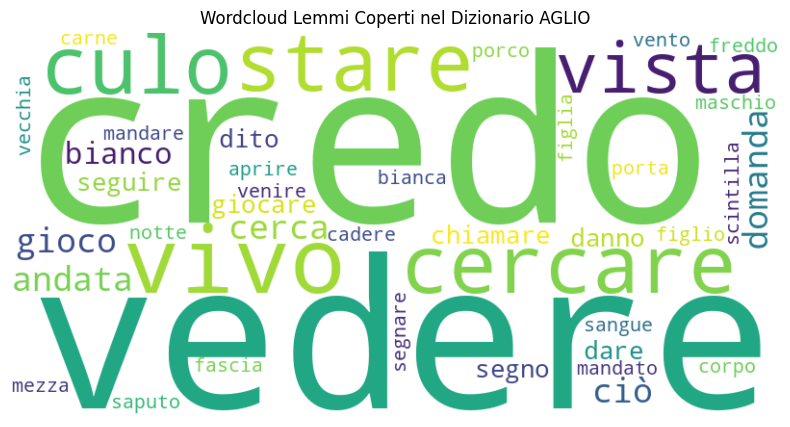

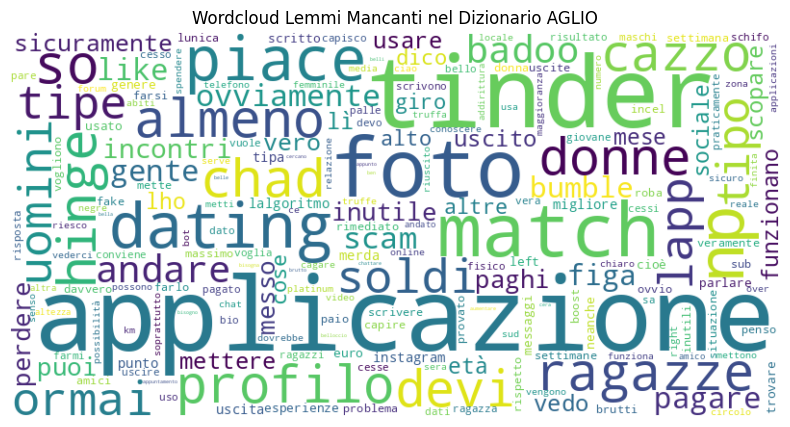

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Lemmi coperti: estrai lemma + frequenza dove almeno un link è presente
df_coperti = df.loc[
    (df['Mappa'] != '-') | (df['Aree'] != '-') | (df['Forme'] != '-'),
    ['Lemma_univoco', 'Frequenza']
]

#Lemmi mancanti: estrai lemma + frequenza dove tutti i link sono '-'
df_mancanti = df.loc[
    (df['Mappa'] == '-') & (df['Aree'] == '-') & (df['Forme'] == '-'),
    ['Lemma_univoco', 'Frequenza']
]

#Funzione per creare wordcloud da colonna 'frequenza'
def crea_wordcloud_da_freq(df_lemmi, titolo):
    freq_dict = dict(zip(df_lemmi['Lemma_univoco'], df_lemmi['Frequenza']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titolo)
    plt.show()

#wordcloud
crea_wordcloud_da_freq(df_coperti, "Wordcloud Lemmi Coperti nel Dizionario AGLIO")
crea_wordcloud_da_freq(df_mancanti, "Wordcloud Lemmi Mancanti nel Dizionario AGLIO")

## VoDIM
Per dare modo all’utente che utilizzerà il nostro dizionario computazionale di **approfondire il significato dei termini**, in questa fase estendiamo il vocabolario aggiungendo **due nuovi link di riferimento per ogni lemma**:

- uno al sito *Stazione Lessicografica*, tramite una query automatica sul lemma;
- uno a *Wiktionary*, il dizionario collaborativo multilingue.

Questi link vengono generati dinamicamente per **tutti i lemmi**, anche quelli non presenti nel dizionario AGLIO.  
Il risultato viene salvato in un nuovo file CSV, utile per la futura consultazione online del vocabolario.

---
La **Stazione Lessicografica** è una risorsa sviluppata dall’*Accademia della Crusca* nell’ambito del progetto **VoDIM – Vocabolario Dinamico dell’Italiano Moderno**.

Il suo scopo è offrire un punto di accesso integrato a una rete di risorse linguistiche, permettendo di interrogare in modo simultaneo:
- **corpora principali e archivi testuali**;
- **dizionari storici e digitali** (es. *Tommaseo-Bellini*, *GDLI*);
- **strumenti lessicografici avanzati**, come **ArchiDATA** (archivio di retrodatazioni lessicali).

La Stazione non si limita a restituire definizioni: essa **trasforma la consultazione in un percorso esplorativo**, aggregando contenuti da diverse fonti e facilitando l’accesso alle informazioni linguistiche. Le risorse sono anche **distinte graficamente per colore**, per facilitare la navigazione:
- Rosso: dizionari generali  
- Granata: ortografia e pronuncia  
- Verde: ArchiDATA  
- Azzurro: banche dati  
- Viola: archivi giornalistici  

*La Stazione Lessicografica segna il **ritorno dell’Accademia della Crusca all’attività lessicografica diretta**, dopo la sospensione del celebre Vocabolario nel 1923.*

Questa integrazione rende il nostro dizionario computazionale **non solo una raccolta di termini frequenti**, ma un **ponte verso una rete di significati e fonti affidabili**, utili per ricerche linguistiche, analisi testuali e studio del lessico contemporaneo.

In [21]:
df = pd.read_csv("vocabolario_con_link_aglio.csv")

# Crea le due nuove colonne per tutti i lemmi
df['link_stazionelessicografica'] = df['Lemma_univoco'].apply(
    lambda l: f"www.stazionelessicografica.it/ricerca?str={l}"
)
df['link_wiktionary'] = df['Lemma_univoco'].apply(
    lambda l: f"https://en.wiktionary.org/wiki/{l}"
)

# Salva il risultato in un nuovo file
df.to_csv("vocabolario_con_link_completo.csv", index=False, encoding="utf-8")

print("File 'vocabolario_con_link_completo.csv' salvato con link per TUTTI i lemmi.")

# Stampa alcuni esempi
print("\n Esempi dei primi lemmi con i nuovi link:\n")
for _, row in df[['Lemma_univoco', 'link_stazionelessicografica', 'link_wiktionary']].head(2).iterrows():
    print(f"- Lemma: {row['Lemma_univoco']}")
    print(f"  Stazione: {row['link_stazionelessicografica']}")
    print(f"  Wiktionary: {row['link_wiktionary']}\n")
print(df.loc[109])

File 'vocabolario_con_link_completo.csv' salvato con link per TUTTI i lemmi.

 Esempi dei primi lemmi con i nuovi link:

- Lemma: abbonamenti
  Stazione: www.stazionelessicografica.it/ricerca?str=abbonamenti
  Wiktionary: https://en.wiktionary.org/wiki/abbonamenti

- Lemma: abbonamento
  Stazione: www.stazionelessicografica.it/ricerca?str=abbonamento
  Wiktionary: https://en.wiktionary.org/wiki/abbonamento

Lemma_univoco                                                            andata
Frequenza                                                                     4
ID                                                                          110
Mappa                                  http://aglio.ovi.cnr.it/lemma.php?le=534
Aree                               http://aglio.ovi.cnr.it/results_a.php?le=534
Forme                              http://aglio.ovi.cnr.it/results_f.php?le=534
link_stazionelessicografica    www.stazionelessicografica.it/ricerca?str=andata
link_wiktionary              


Grazie all’integrazione con **AGLIO, VoDIM e Wiktionary**, ogni lemma nel vocabolario computazionale può essere:
- **esplorato nel presente** (attraverso Wiktionary),
- **contestualizzato nel passato** (attraverso AGLIO e le risorse OVI),
- **ricollocato nello spazio linguistico** (attraverso la mappatura geolinguistica).

Questa doppia prospettiva (diacronica e sincronica) rende il vocabolario **uno strumento dinamico**, utile per l’analisi linguistica, la didattica, e l’esplorazione del lessico italiano.

Con il seguente script ha lo scopo di *arricchiamo* il **vocabolario computazionale italiano del forum** con l'informazione grammaticale **(POS – Part-of-Speech)**, utilizzando spaCy e la mappatura da un dataset preesistente (dataset creato precedentemente). Al termine, viene generato un file CSV pronto per la consultazione online.

In [22]:
# Carica il modello spaCy italiano
nlp = spacy.load("it_core_news_sm")

# Carichiamo il dizionario, inclusa la colonna "Frequenza"
df = pd.read_csv("vocabolario_con_link_completo.csv")

# Teniamo solo le colonne utili (inclusa "Frequenza")
colonne_da_tenere = [
    "Lemma_univoco",
    "Frequenza",
    "Mappa",
    "Aree",
    "Forme",
    "link_stazionelessicografica",
    "link_wiktionary"
]
df = df[colonne_da_tenere].copy()

# Carichiamo il file con Lemmi_POS
df_pos = pd.read_csv("Dataset_FDB_aggiornato.csv")

# Creiamo il dizionario lemma → POS
lemma_pos_mapping = {}
for row in df_pos["Lemmi_POS"].dropna():
    try:
        for token in row.strip().split():
            if '/' in token:
                lemma, pos = token.rsplit('/', 1)
                lemma = lemma.strip().lower()
                if lemma not in lemma_pos_mapping:
                    lemma_pos_mapping[lemma] = pos
    except:
        continue

# Funzione per assegnare POS
def assegna_pos_finale(lemma):
    lemma = lemma.lower()
    if lemma in lemma_pos_mapping:
        return lemma_pos_mapping[lemma]
    else:
        doc = nlp(lemma)
        if len(doc) > 0:
            return doc[0].pos_
        return "x"

# Applichiamo la funzione
df["POS"] = df["Lemma_univoco"].apply(assegna_pos_finale)

# Salviamo su CSV
df.to_csv("dizionario_online_forum.csv", index=False, encoding="utf-8")
print("File 'dizionario_online_forum.csv' aggiornato con successo.")
print("\n---\n")
print(df.head(5))
print("\n---\n")
print(df.loc[109])

File 'dizionario_online_forum.csv' aggiornato con successo.

---

  Lemma_univoco  Frequenza Mappa Aree Forme  \
0   abbonamenti          1     -    -     -   
1   abbonamento          1     -    -     -   
2      abbonano          1     -    -     -   
3    abbondante          1     -    -     -   
4    abbondanti          1     -    -     -   

                         link_stazionelessicografica  \
0  www.stazionelessicografica.it/ricerca?str=abbo...   
1  www.stazionelessicografica.it/ricerca?str=abbo...   
2  www.stazionelessicografica.it/ricerca?str=abbo...   
3  www.stazionelessicografica.it/ricerca?str=abbo...   
4  www.stazionelessicografica.it/ricerca?str=abbo...   

                              link_wiktionary   POS  
0  https://en.wiktionary.org/wiki/abbonamenti   ADJ  
1  https://en.wiktionary.org/wiki/abbonamento  NOUN  
2     https://en.wiktionary.org/wiki/abbonano  VERB  
3   https://en.wiktionary.org/wiki/abbondante   ADJ  
4   https://en.wiktionary.org/wiki/abbondant

In questa fase del progetto, si arricchisce il dizionario con i **contesti estratti da un corpus di commenti**, rendendo possibile un’analisi più approfondita e concreta degli usi reali di ciascun lemma.

Collegare ogni lemma presente nel dizionario con una serie di **esempi di frasi o commenti** in cui esso è **effettivamente utilizzato nel corpus**, per fornire un *supporto pratico* alla comprensione e allo studio.

- `Lemma_univoco`: il lemma standardizzato  
- `Frequenza`: numero di occorrenze nel corpus  
- `POS`: parte del discorso associata  
- `Mappa`, `Aree`, `Forme`: dati morfo-geografici e lessicografici= AGLIO
- `link_stazionelessicografica`,link che riportano a VoDIM
- `link_wiktionary`: URL per approfondimenti, soprattutto per termini inglesi  
- `Contesto`: lista di frasi/commenti in cui il lemma appare

In [24]:
import spacy
from collections import defaultdict

nlp = spacy.load("it_core_news_sm")

# Carica il file con i lemmi del dizionario (che contiene già la frequenza)
df_vocab = pd.read_csv("dizionario_online_forum.csv")

# 1. Estrai solo le colonne utili
colonne_da_tenere = [
    "Lemma_univoco",
    "Mappa",
    "Aree",
    "Forme",
    "link_stazionelessicografica",
    "Frequenza",
    "POS",
    "link_wiktionary"
]
df_vocab = df_vocab[colonne_da_tenere].copy()

# Carica il dataset con commenti e lemmi
df_corpus = pd.read_csv("Dataset_FDB_aggiornato.csv")

# 2. Estrai contesti dal corpus
lemma_to_context = defaultdict(list)
for _, row in df_corpus.iterrows():
    lemmi = str(row["Lemmi"]).split()
    commento = row["Normalizzato"]
    for lemma in set(lemmi):  # evita duplicati
        lemma_to_context[lemma].append(commento)

# 3. Crea dataframe dei contesti
df_contesti = pd.DataFrame([
    {"Lemma_univoco": lemma, "Contesto": list(set(commenti))}
    for lemma, commenti in lemma_to_context.items()
])

# 4. Unisci i contesti al dizionario
df_vocab = df_vocab.merge(df_contesti, on="Lemma_univoco", how="left")

# 5. Salva il file aggiornato
df_vocab.to_csv("dizionario_online_forum.csv", index=False, encoding="utf-8")

# Stampa di controllo
print("Prime righe del dizionario con contesto:")
print(df_vocab[["Lemma_univoco", "Frequenza", "POS", "Contesto", "Mappa",
    "Aree", "Forme", "link_stazionelessicografica", "link_wiktionary"]].head(3))

Prime righe del dizionario con contesto:
  Lemma_univoco  Frequenza   POS  \
0   abbonamenti          1   ADJ   
1   abbonamento          1  NOUN   
2      abbonano          1  VERB   

                                            Contesto Mappa Aree Forme  \
0  [io da 6 pieno e forse più non ho rimediato ni...     -    -     -   
1  [sì ma voglio dire ho anche pagato per mettere...     -    -     -   
2  [il decadimento di queste applicazione non cen...     -    -     -   

                         link_stazionelessicografica  \
0  www.stazionelessicografica.it/ricerca?str=abbo...   
1  www.stazionelessicografica.it/ricerca?str=abbo...   
2  www.stazionelessicografica.it/ricerca?str=abbo...   

                              link_wiktionary  
0  https://en.wiktionary.org/wiki/abbonamenti  
1  https://en.wiktionary.org/wiki/abbonamento  
2     https://en.wiktionary.org/wiki/abbonano  


**Questo script trasforma il file CSV del dizionario** (`dizionario_online_forum.csv`) **in un array JavaScript** (`dizionario_online.js`). Il file `.js`, *adattato per una migliore leggibilità*, avrà una variabile `const vocabolario` al suo interno, che contiene un array di oggetti JSON, ognuno rappresentante una voce del dizionario.

Il file `dizionario_online.js` è stato incluso all’interno di una pagina HTML creata appositamente per rendere il dizionario più accessibile e facilmente interrogabile.  
- È possibile accedere a tutte le informazioni lessicografiche contenute nel dizionario, inclusi i lemmi, le frequenze, le parti del discorso e i contesti d’uso estratti dal corpus.  
- La pagina web supporta funzionalità interattive come la ricerca rapida di lemmi, la visualizzazione dettagliata dei dati associati e approfondimenti lessicali direttamente fruibili dall’utente, senza bisogno di consultare manualmente i file CSV o JSON.

Questa soluzione permette un’esperienza utente più fluida e immediata, trasformando il semplice archivio dati in uno **strumento digitale consultabile e navigabile**, adatto a ricerche linguistiche e didattiche.

*Output esempio:*
```json
{
    "lemma": "andare",
    "frequenza": 2,
    "id": 110,
    "pos": "VERB",
    "contesto": "Vado al mercato ogni mattina.",
    "mappa": "link AGLIO",
    "aree": "link AGLIO",
    "forme": "link AGLIO",
    "VoDIM": "https://stazionelessicografica.it/andare",
    "wiktionary": "https://it.wiktionary.org/wiki/andare"
}

In [25]:
import json

#Carichiamo il CSV
df = pd.read_csv("dizionario_online_forum.csv")

#Aggiungiamo un ID numerico partendo da 1
df.insert(0, "id", range(1, len(df) + 1))

#Estraiamo il primo contesto se è una lista codificata come stringa
def estrai_primo_contesto(valore):
    if isinstance(valore, str) and valore.startswith("["):
        try:
            lista = eval(valore)
            return lista[0] if lista else ""
        except:
            return valore
    return valore

df["Contesto"] = df["Contesto"].apply(estrai_primo_contesto)

#Convertiamo ogni riga in dizionario rispettando ordine e campi opzionali
risultato = []
for _, row in df.iterrows():
    voce = {
        "lemma": row["Lemma_univoco"],
        "frequenza": int(row["Frequenza"]) if pd.notna(row["Frequenza"]) else 0,
        "id": int(row["id"]) }
    if pd.notna(row.get("POS")):
        voce["pos"] = row["POS"]
    if pd.notna(row.get("Contesto")):
        voce["contesto"] = row["Contesto"]

    #Salta i campi se sono "-" oppure vuoti
    if pd.notna(row.get("Mappa")) and row["Mappa"].strip() != "-":
        voce["mappa"] = row["Mappa"]
    if pd.notna(row.get("Aree")) and row["Aree"].strip() != "-":
        voce["aree"] = row["Aree"]
    if pd.notna(row.get("Forme")) and row["Forme"].strip() != "-":
        voce["forme"] = row["Forme"]
    if pd.notna(row.get("link_stazionelessicografica")):
        voce["VoDIM"] = row["link_stazionelessicografica"]
    if pd.notna(row.get("link_wiktionary")):
        voce["wiktionary"] = row["link_wiktionary"]
    risultato.append(voce)

#Scrive in un file .js come array JavaScript
with open("dizionario_online.js", "w", encoding="utf-8") as f:
    f.write("const vocabolario = [\n")
    for voce in risultato:
        f.write(json.dumps(voce, ensure_ascii=False, indent=4) + ",\n")
    f.write("];\n")
print("File 'dizionario_online.js' generato con successo.")

File 'dizionario_online.js' generato con successo.


## CONCLUSIONI

Il progetto, nella forma in cui l’ho realizzato, rappresenta una **versione base e ancora incompleta** dell’idea iniziale. Il mio lavoro rientra pienamente nell’ambito dello **spoglio elettronico**, un approccio che ha rivoluzionato la lessicografia, permettendo l’estrazione e la classificazione di dati linguistici attraverso strumenti computazionali.  

*Criticità emerse:*
* **Associazione POS (Part-of-Speech)**: molte etichette risultano errate. Nonostante l’utilizzo di **strumenti automatici** (*POS taggers*), ho riscontrato ambiguità che richiederebbero una **revisione manuale**: ad esempio, distinguere *stato* come nome o verbo dipende fortemente dal contesto.

* **Tokenizzazione e lemmatizzazione**: ho incontrato particolari difficoltà con i termini inglesi, spesso *tokenizzati* e *lemmatizzati* in modo scorretto. Anche evitando di forzare il modello verso forme italiane, alcuni termini venivano comunque modificati. Ho adottato **regex** e variabili dizionario per escludere o correggere certi casi, ma i risultati non sono sempre stati affidabili.


È quindi evidente che sarà necessaria un’**analisi più approfondita** del corpus (e dell’intero forum) per migliorare l’affidabilità del dizionario. Inoltre, utilizzare un **corpus più esteso** potrebbe aiutare a compensare la *rarità dei dati linguistici*, migliorando la robustezza dei risultati.

---

### Idee future
Si potrebbe realizzare una **mini-WordNet** per collegare ogni lemma a *sinonimi*, *iperonimi* e altre relazioni semantiche. Questo permetterebbe di introdurre **filtri concettuali** nel dizionario online e offrire una navigazione più semantica che alfabetica.
È un approccio ispirato alla **lessicografia onomasiologica**, dove le parole non sono solo elencate, ma anche *collegate concettualmente*. Progetti come *DHistOntology* o *HTE* ne sono esempi avanzati.

Inoltre, si potrebbe anche ampliare l’analisi del corpus seguendo il modello proposto in *Testo e computer*. Un corpus è una **miniera di dati linguistici** e offre moltissime opportunità di studio, tra cui:
* **Ricchezza lessicale**: analizzando il rapporto tra *parole tipo* e *parole unità*, è possibile valutare la varietà del lessico.
* **Hapax**: individuare le parole che compaiono una sola volta aiuta a capire la rarità dei termini e il comportamento del vocabolario.
* **Collocazioni**: Sequenze di parole che ricorrono insieme frequentemente, rivelando espressioni idiomatiche e schemi sintattici. L’uso di misure come la *Mutua Informazione* aiuta a identificarle, anche considerando legami non adiacenti. (capelli turchini)

L'obiettivo resta quello di trasformare un **testo grezzo** in una **fonte strutturata e interrogabile di dati linguistici**, utile tanto per la **ricerca accademica** quanto per applicazioni **didattiche o digitali**.